# Parsing and Analyzing Meta Corpus Data with Music21

This is a companion tutorial for analyzing meta corpus data from my dissertation, "Diatonic Chord Loops in Post-millennial Pop," with Music21.

This is an interactive "notebook" where you can run the code on this page as you follow along.

## What is Music21, and why should I use it?

As noted on the [Music21 website](https://www.music21.org/music21docs/about/what.html#what-is-music21):

> Music21 is a Python-based toolkit for computer-aided musicology.

> People use music21 to answer questions from musicology using computers, to study large datasets of music, to generate musical examples, to teach fundamentals of music theory, to edit musical notation, study music and the brain, and to compose music (both algorithmically and directly).

Music21 is a Python library that allows you to parse and analyze music data of different formats (e.g., MIDI, MusicXML, humdrum, etc.).  
One of the data formats Music21 can read in is de Clercq & Temperley's (2011) Billboard Rock Corpus encoding format, which meta corpus data encoding system is built.

## What do I need to get started?

You will need a computer with the following installed:

- music21
- Python
- Musescore (for generating scores from parsed meta corpus data)

Check out the installation guide for each operating system and recommendations, here: https://www.music21.org/music21docs/usersGuide/usersGuide_01_installing.html

If you are new to coding and working with Python, I highly recommend going through the first few chapters of these tutorials first. 

- https://www.music21.org/music21docs/usersGuide/usersGuide_01_installing.html#
- https://www.linewaves.org/

## Importing different music data formats with Music21

A main reason I chose music21 for working with data is because of its flexibility in reading different varieties of data formats. Once the data is parsed and loaded to music21, it can be operated and manipulated like any other music21 object, harnessing the analytical power of music21. Moreover, music21 object can be exported into desired formatting, including MIDI, PDF score in Western staff notation, and more. 

For more information about parsing and converting different data formats with music21, jump over to this guide: https://www.music21.org/music21docs/usersGuide/usersGuide_08_installingMusicXML.html

### music21.romanText.clercqTemperley

In this tutorial, we will use the module `music21.romanText.clercqTemperley` to read in and parse our meta corpus data.

Read more about this module here:

https://www.music21.org/music21docs/moduleReference/moduleRomanTextClercqTemperley.html

## Importing meta pop corpus data

To begin, create a Python file in the editor of your choice and add the following lines:

In [1]:
from music21 import *
import os

I have a folder `/meta-pop-corpus` which contains transcriptions of the songs I want to analyze. 




In [2]:
path = os.getcwd() + "/meta-pop-corpus/"
#print(path)
# Check what files I have in the current diectory, and add to a list of files
pathList = []
fileList = []

## This can be avoided by creating a local corpus

With `music21.romanText.clercqTemperley` module, Music21 can read condensed .har text files and expand it into a readable score form. This can help us to see what the real 'key' is regardless of each transcriber's bias towards tonic. 

Meta corpus is encoded in tonic-agnostic way, but this module requires Roman numeral labelling. To work with this requirement, meta corpus data can be encoded in tonic-agnostic Roman numerals. The "key" specified withithin square brakets simply indicate key signature, regardless of the song's suggested centricities (or lack thereof).

This is how meta corpus data for "Get Lucky" translated into Roman numerals look like.

```
% get lucky

a: ii | IV | vi | V | %only one chord loop throughout
In: $a*4
Vr: $a*2
PCh: $a*2     %pre chorus 
Ch: $a*2
PostCh: $a    % post chorus
Instr: $a     %instrumental
Br: $a*5  %bridge
PostCh_long: $a*4
Outro: $a*6

S: [A] $In $Vr $PCh $Ch $PostCh $Instr $Vr $PCh $Ch $PostCh $Ch $PostCh $Ch $PostCh $Br $PCh $Ch $PostCh_long $Outro
```

Now, let's read "Get Lucky" into music21 and view them as a score.

/Users/jinnypark/Documents/GitHub/meta-corpus-tutorial/meta-pop-corpus/get_lucky.har


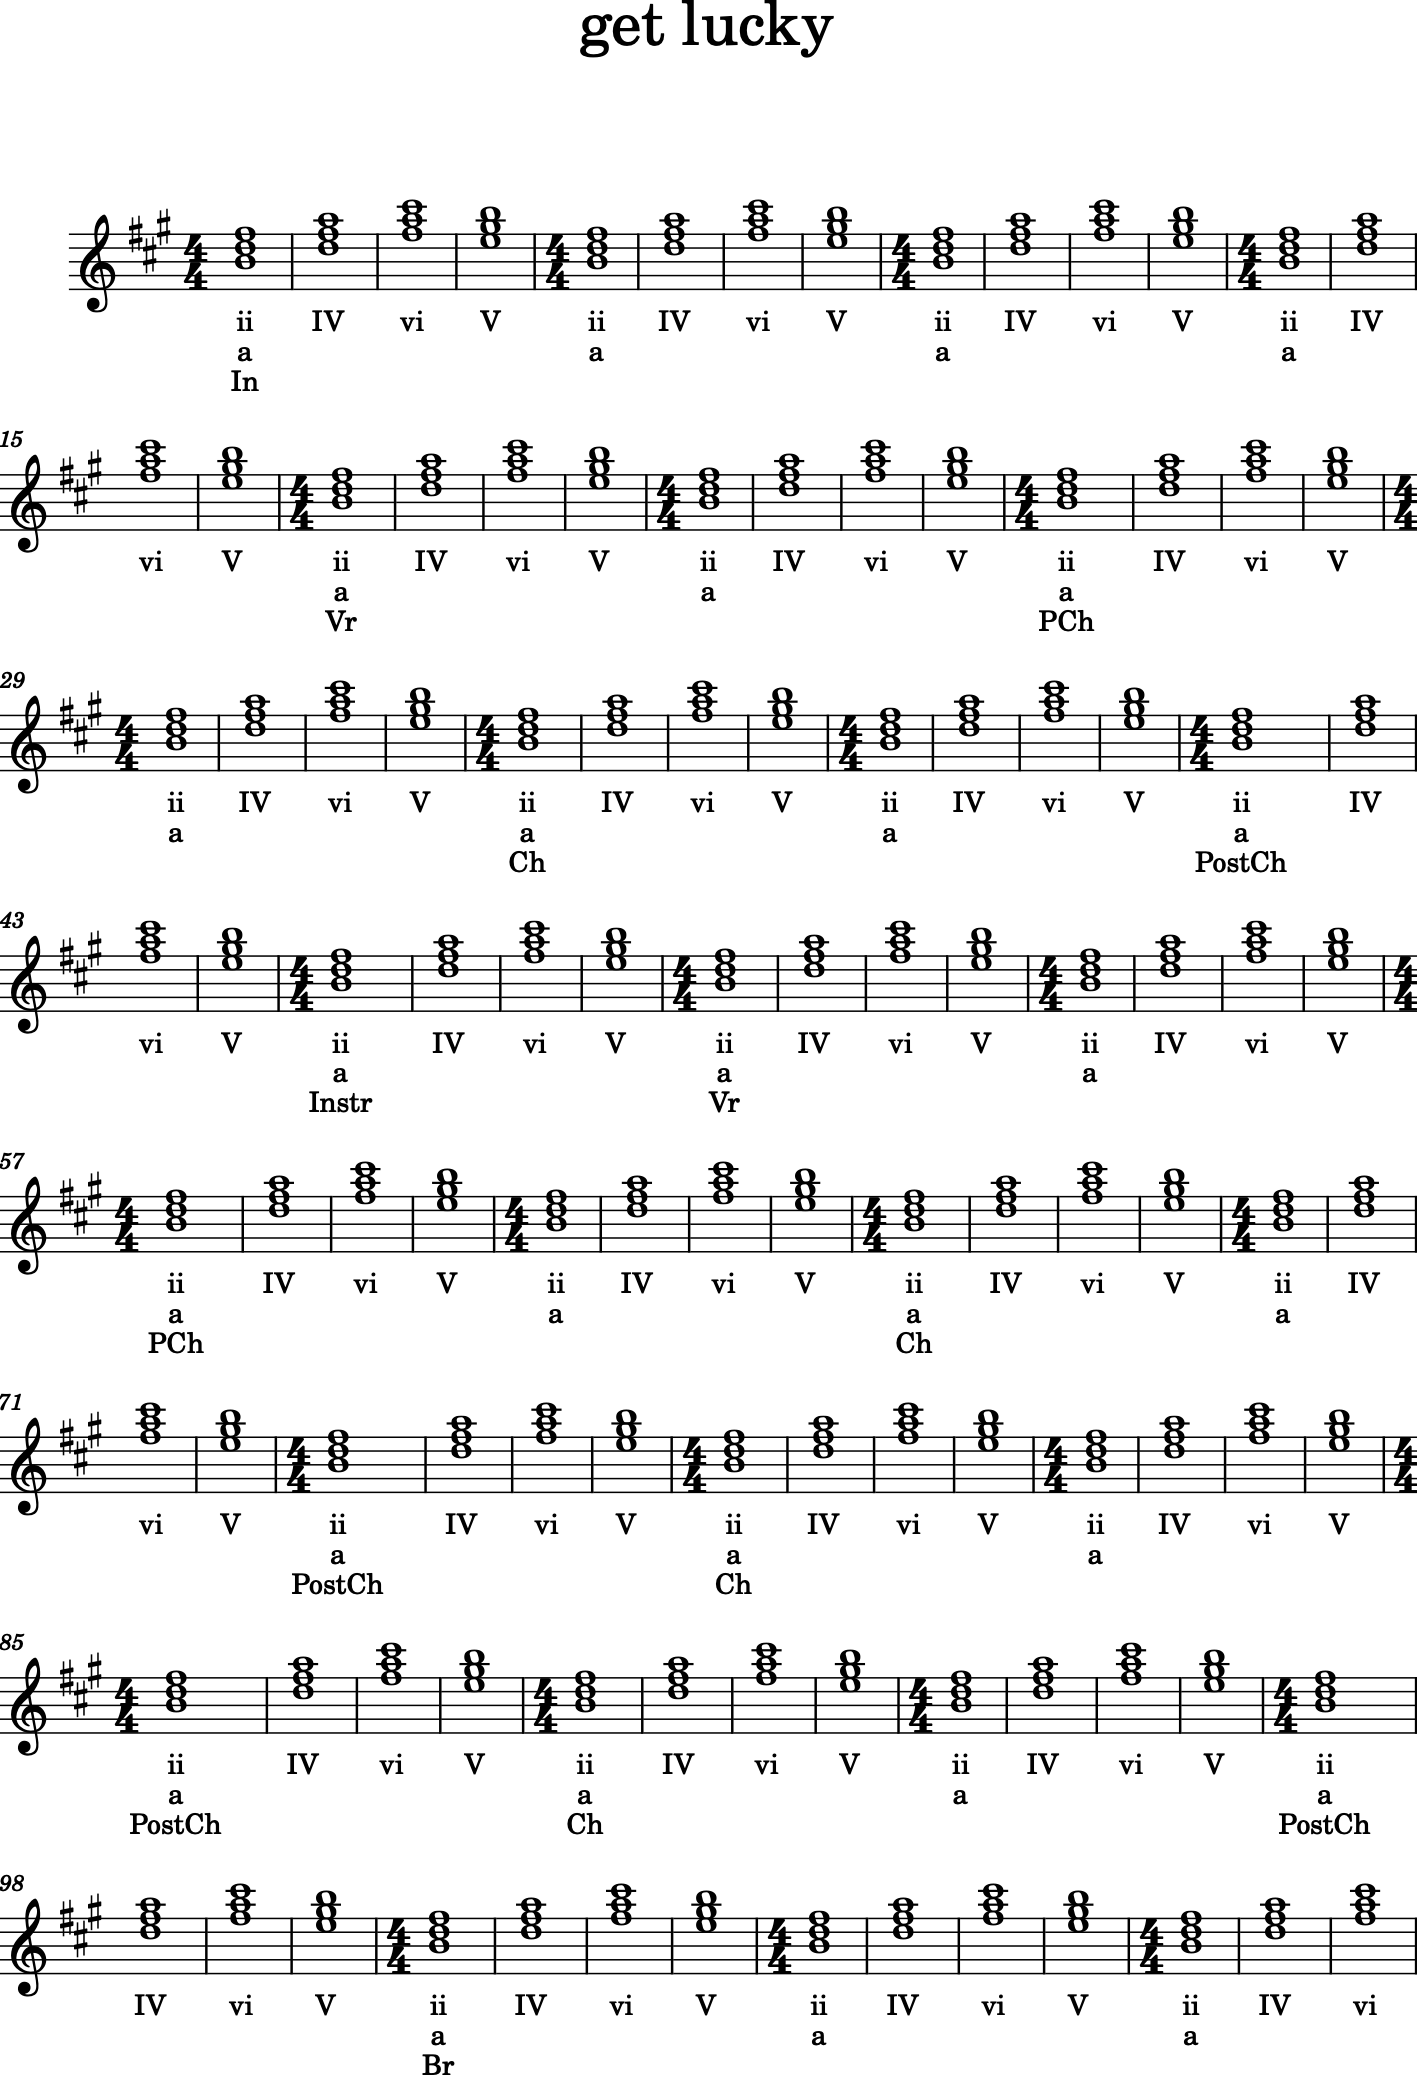

In [3]:
## Read in Get Lucky file into music21
getLucky = path + "get_lucky.har"
print(getLucky)
loadedSong = open(getLucky).read()

## Convert the .har file using the module

data = romanText.clercqTemperley.CTSong(loadedSong)

## Convert the loaded Get Lucky data into a score, and display it 
## (open via notation software of your choice, e.g., musescore).

song_score = data.toScore()
song_score.show()

### Analyzing Meta Corpus data with music21

Now that our data is loaded to music21, we can utilize many analytical tools music21 provides. With the aid of the computer, answering questions related to counting is very quick and easy.

#### Counting pitches



In [ ]:
for rule in data.rules:
    print(data.rules[rule].LHS)
    print(data.rules[rule].musicText)
    

if LHS == "S", it is indicating overall form of the song.
We want to extract repeated segments of the chord progression (chord-loop, or chord-loop schema) so we can identify patterns. Usual N-grams often go over the boundaries of the hypermetrical structure (often across formal sections) which may lead us to biased results. 

In both versions, D# is rarely used (bVII = D Major). Sometimes G# becomes G-natural too. (bIII)
If we looked at overall pitch distribution, we can put more effective key signature of AM (or even DM). 


Look for chord data only:

In [ ]:
## Look for all chord progressions encoded in the text file and create a dictionary of them.
chord_loop = {}
chord_loop_repeats = {}
counter = -1

for rule in data.rules:
    current_rule = data.rules[rule].musicText # just the text portion
    print("current rule is: ", current_rule)
    if "|" in data.rules[rule].musicText:
        chord_prog = data.rules[rule].musicText
        chord_prog_var = data.rules[rule].LHS
        chord_loop.update({chord_prog: chord_prog_var})
        counter = counter + 1
        
### IF the variable in chord_loop dictionary ("a") 
### exists in the rule in the musicText portion (data.rules[rule].musicText), 
    ## Check if chord loop variable exists in a dictionary and save the value
    #chord_loop_value = chord_loop.get(data.rules[rule].musicText)
    
    #chord_loop_value_index = current_rule.index(chord_loop_value)
    #print(chord_loop_value_index)

    ### REDO THIS SECTION###
    #
    
    else:
        current_chord_loop_dict_item = list(chord_loop.values())[counter]
        print("Current chord loop dict item is: ",current_chord_loop_dict_item)
        print("current rule without chords transcription is: ", current_rule)
        if current_chord_loop_dict_item in current_rule:
            print('we found it:', current_rule)
            print('the position of "*" is: ', current_rule.index("*"))
            pos_of_repeats = current_rule.index("*") + 1
            print('the position of repeats is: ', pos_of_repeats)
            print("current chord loop, ", current_chord_loop_dict_item, "repeats ", current_rule[pos_of_repeats], "times")

#        if "*" in data.rules[rule].musicText:
### Extract the integers in that rule in .musicText portion using index() method (e.g., i = data.rules[rule].musicText.index("*") + 1)
#            repeat_sign_index = data.rules[rule].musicText.index("*")
#            print(data.rules[rule].musicText[repeat_sign_index])
        

#    print("counter is: ", counter)
#    print("answer to the key is:" ,chord_loop.get(data.rules[rule].musicText))

#    print("The position of '*' is: ", data.rules[rule].musicText.index("*"))
#    print("num of repeats is: ", list(chord_loop.keys())[counter])
#    print("end of for loop")

              #    if "*" in data.rules[rule].musicText.index("*"): 
### IF the variable in chord_loop dictionary ("a") 
### exists in the rule in the musicText portion (data.rules[rule].musicText), 
### Extract the integers in that rule in .musicText portion using index() method (e.g., i = data.rules[rule].musicText.index("*") + 1)

#    if chord_loop.get(data.rules[rule].LHS) == list(chord_loop.keys())[counter]:
#        print(yay)
#    if (chord_loop[data.rules[rule].LHS] in data.rules[rule].musicText) and ("*" in data.rules[rule].musicText):
#        repeats = data.rules[rule].musicText.index("*") 
#        print(data.rules[rule].LHS, repeats)        
#    counter = counter + 1
#        chord_loop_repeats.update({chord_prog})
#print(chord_loop)
#    if rule in chord_loop:
        
#    print(chord_loop)
        
#print(chord_loop)

#for rule in data.rules:
#    if 

#for rule in data.rules:
#    if data.rules[rule].LHS in chord_loop:
#        print(chord_loop[data.rules[rule].LHS, "repeats ", chord_loop[data.rules[rule].]])


In [ ]:
## How many times does each chord appear in a song?

#for rule in data.rules:
#    if "*" in data.rules["s"]: 
#        print(rule["s"])

data.rules["S"]
## Check if repetitions are specified in the formal section itself:

if "*" in data.rules["S"].musicText:
    print(data.rules["S"].musicText)

    


In [ ]:
for rule in data.rules:
    print(data.rules[rule].parent.expandExpansionContent)



In [ ]:
for rule in data.rules:
    if "|" in data.rules[rule].musicText:
        print(data.rules[rule].musicText)
    


In [ ]:
for rule in data.rules:
    if "|" in data.rules[rule].musicText:
        print(data.rules[rule].musicText)
    


** TO DO **
- Roman numerals are misleading: Grab the 'real' chord label (
  